# Assignment 2: Movie Recommender System
## Notebook 0.1: Dataset exploration
> Practical Machine Learning & Deep Learning course, Fall 2023
#### Author of the notebook: Vladislav Urhzumov, BS21-AI-01

---




### Libraries import

In [16]:
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

### Constant setting

In [1]:
names = ['user_id', 'movie_id', 'rating', 'timestamp']
user_col, movie_col = 'user_id', 'movie_id'

### Dataset preprocessing

Data is present in the format of

---

[user_id | movie_id | rating | timestamp]:

In [12]:
data = pd.read_csv('/content/u.data', sep='\t', names=names)
data

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


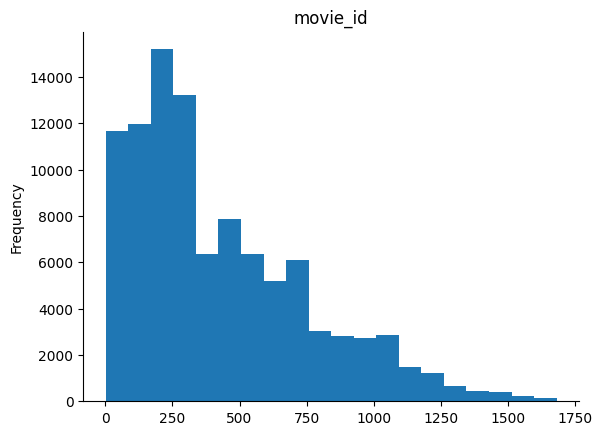

In [10]:
# movie popularity
data['movie_id'].plot(kind='hist', bins=20, title='movie_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

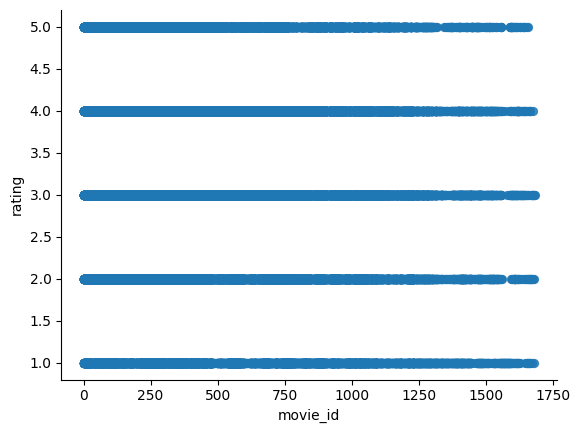

In [5]:
# rating distribution (any movies biased? seems not)
data.plot(kind='scatter', x='movie_id', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

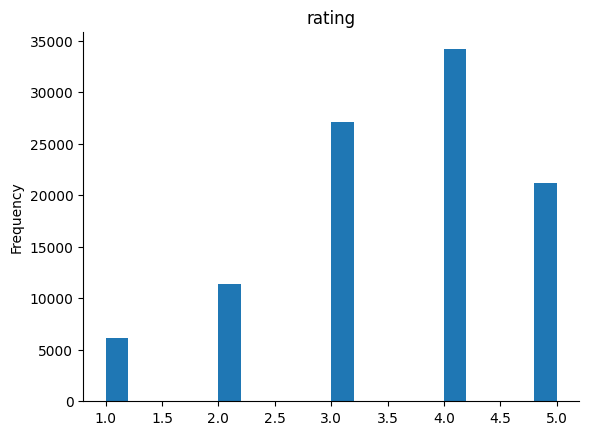

In [6]:
# rating frequency (most frequent: 4.0)
# seems that people like rating films as "average" or "positively average", 3 or 4 correspondingly
# most of our predictions most probably will be between 3 and 4
data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

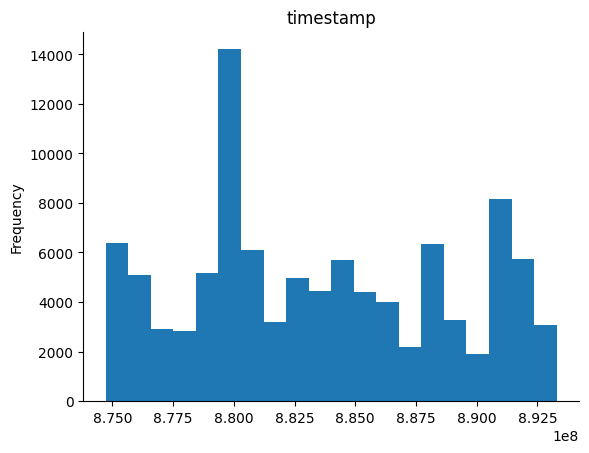

In [7]:
# exploration of timestamp frequency. We'll need it to sort ratings by time
data['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

This raw format is no use for our algorithms, even after extracting some information for exploratory charts.

We need to create **sparse matrix** with user_id as row index and movie_id as columns. Items must be ratings.

The following format of data is useful for further processing

In [8]:
# Create a user-item matrix
user_item_matrix = data.pivot(index=user_col, columns=movie_col, values='rating')
user_item_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.head(10)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [ ]:
user_item_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: float64(1682)
memory usage: 12.1 MB


### We also have 'uN.base' and 'uN.test' files for evaluation.
we'll consider the u1 kit:

In [14]:
data = pd.read_csv('/content/u1.base', sep='\t', names=names)
data

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [15]:
test = pd.read_csv('/content/u1.test', sep='\t', names=names)
test

,user_id,movie_id,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198
...,...,...,...,...
19995,458,648,4,886395899
19996,458,1101,4,886397931
19997,459,934,3,879563639
19998,460,10,3,882912371


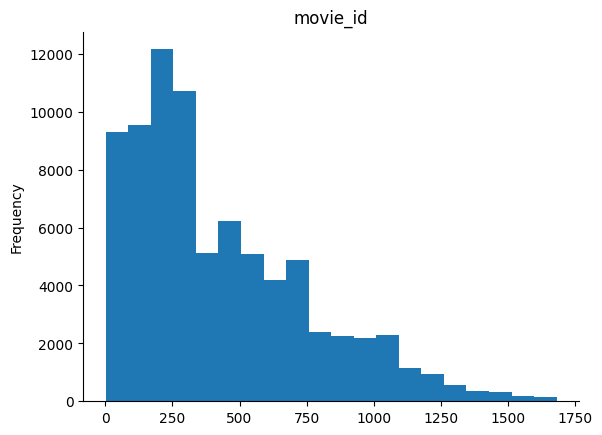

In [17]:
# movie popularity in u1.base
data['movie_id'].plot(kind='hist', bins=20, title='movie_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

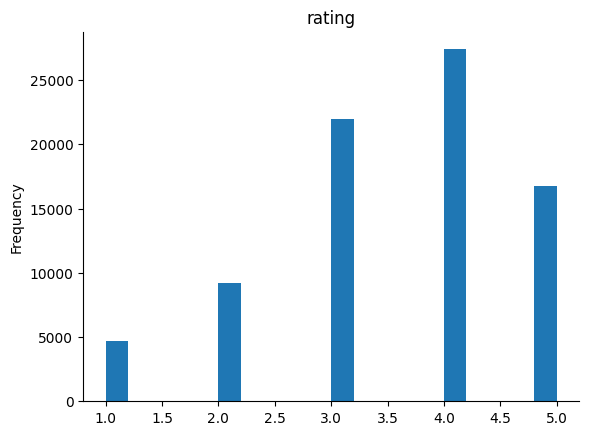

In [18]:
# rating frequency in u1.base (most frequent is still 4.0)
data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

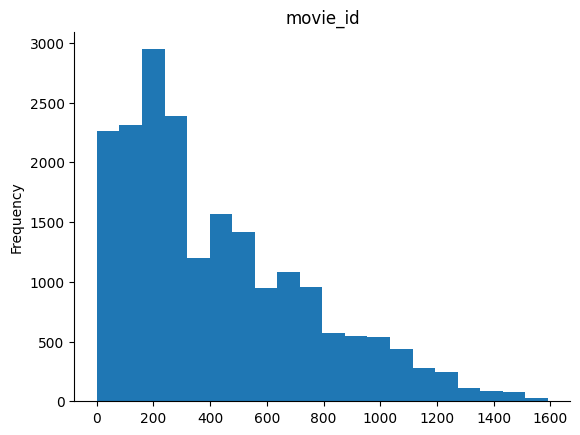

In [19]:
# movie popularity in u1.test
test['movie_id'].plot(kind='hist', bins=20, title='movie_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

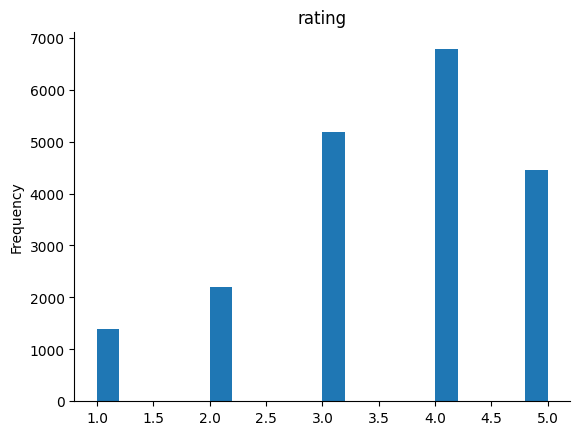

In [20]:
# rating frequency in u1.test (most frequent is still 4.0)
test['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Let us continue the journey in the next jupyter notebooks of the project